In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv('application_data.csv')
print(data.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [3]:
# Summary statistics
print(data.describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

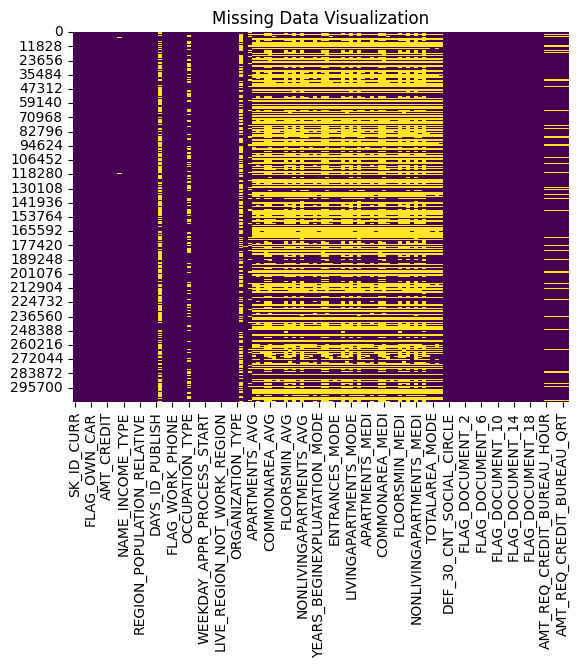

In [4]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

In [5]:
# Get columns that have missing values with percentage > 5%
missing_data = data.isnull().mean() * 100

missing_data = missing_data[missing_data > 5]
print("Length of missing data: ", len(missing_data))
print(missing_data)


Length of missing data:  57
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_1                    56.381073
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVAT

In [6]:
cleaned_data = data.drop(missing_data.index, axis=1)

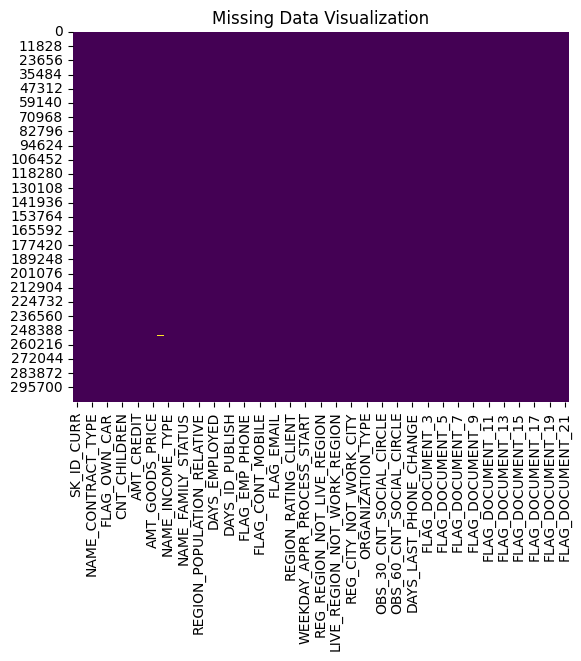

65


In [7]:
sns.heatmap(cleaned_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()
# Count the remaining columns
print(len(cleaned_data.columns))

In [8]:
# Find the categorical columns
categorical_columns = cleaned_data.select_dtypes(include=['object']).columns
print(categorical_columns)

# Check if any of them have missing values
missing_categorical = cleaned_data[categorical_columns].isnull().mean() * 100
print(missing_categorical)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
NAME_TYPE_SUITE               0.420148
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
ORGANIZATION_TYPE             0.000000
dtype: float64


In [9]:
# find any NaN values in the numerical columns
numerical_columns = cleaned_data.select_dtypes(include=['int64', 'float64']).columns
missing_numerical = cleaned_data[numerical_columns].isnull().mean() * 100
missing_numerical = missing_numerical[missing_numerical > 0]
print(missing_numerical)

# Get not missing values
not_missing = cleaned_data[numerical_columns].dropna()
print(not_missing.shape)

# Find any NaN values not_missing
missing_numerical = not_missing.isna().mean() * 100
print(missing_numerical[missing_numerical > 0])


AMT_ANNUITY                 0.003902
AMT_GOODS_PRICE             0.090403
CNT_FAM_MEMBERS             0.000650
EXT_SOURCE_2                0.214626
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64
(305545, 54)
Series([], dtype: float64)


In [22]:
# Fill the missing values with the mean
missing_data = cleaned_data.isnull().mean() * 100
missing_data = missing_data[missing_data > 0]

print(missing_data)
# print means of each column of the missing data only

numerical_columns = cleaned_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = cleaned_data.select_dtypes(include=['object']).columns

# Fill the missing values with the mean for numerical columns
for column in numerical_columns:
    cleaned_data[column] = cleaned_data[column].fillna(cleaned_data[column].mean())
    # cleaned_data[column].fillna(cleaned_data[column].mean())

# Fill the missing values with the mode for categorical columns
for column in categorical_columns:
    cleaned_data[column] = cleaned_data[column].fillna(cleaned_data[column].mode()[0])

AMT_ANNUITY                 0.003902
AMT_GOODS_PRICE             0.090403
NAME_TYPE_SUITE             0.420148
CNT_FAM_MEMBERS             0.000650
EXT_SOURCE_2                0.214626
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64


In [24]:

# # Assuming 'cleaned_data' is your DataFrame
# # Find columns with missing values
# missing_data_columns = cleaned_data.columns[cleaned_data.isnull().any()].tolist()

# # Display the number of columns with missing data and their missing percentage
# missing_data_stats = cleaned_data[missing_data_columns].isnull().mean() * 100
# print("Length of missing data columns: ", len(missing_data_columns))
# print(missing_data_stats)

# # Use DataFrame.describe() to get summary statistics for these columns
# summary_stats = cleaned_data[missing_data_columns].describe(include='all')
# modes = cleaned_data[missing_data_columns].mode().iloc[0]  # Get mode for each column

# # Adding mode to the describe DataFrame
# summary_stats.loc['mode'] = modes

# # Print the enhanced summary statistics
# print("\nEnhanced Statistics of the columns with missing data:\n")
# print(summary_stats)

# # Fill missing values with mode
# cleaned_data.fillna(cleaned_data.mode().iloc[0], inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
categorical_features = [col for col in cleaned_data.columns if cleaned_data[col].dtype == 'object']

# Create a label encoder object
le = LabelEncoder()

print(categorical_features)

# Loop over all categorical variables and label encode them
for col in categorical_features:
    cleaned_data[col] = le.fit_transform(cleaned_data[col])

[]


In [28]:
# Split the data again after encoding
features = cleaned_data.drop('TARGET', axis=1)
targets = cleaned_data['TARGET']

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
forest.fit(features, targets)

RandomForestClassifier(random_state=42)

Length of importances_df:  64


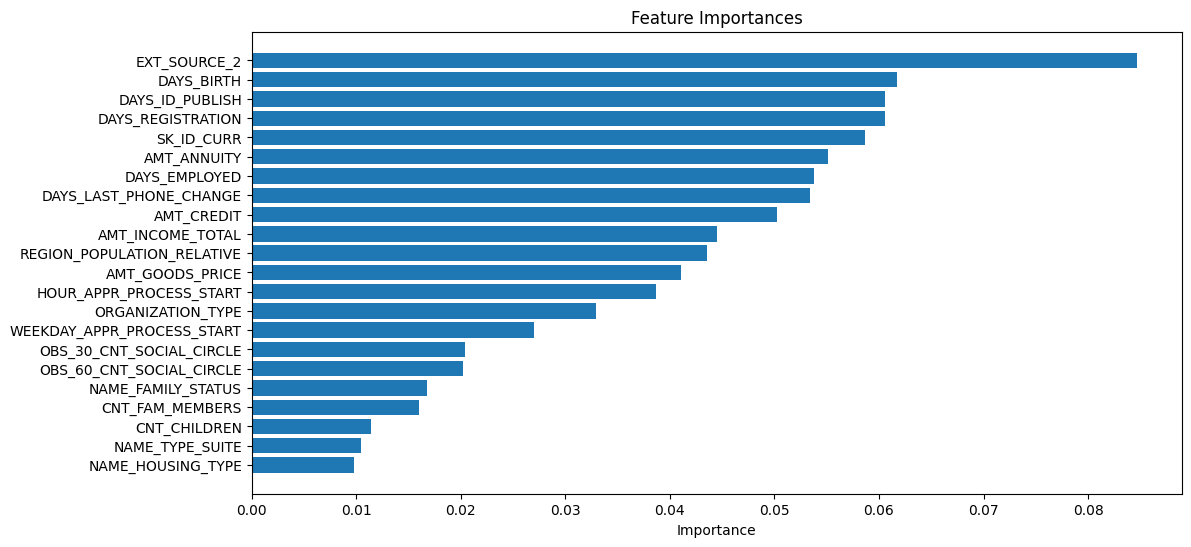

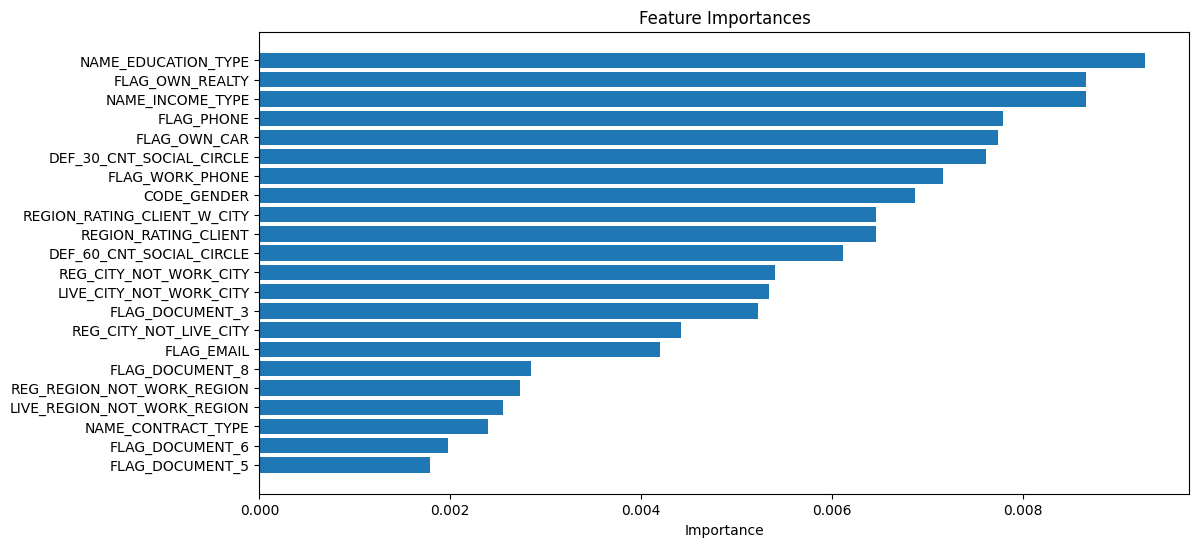

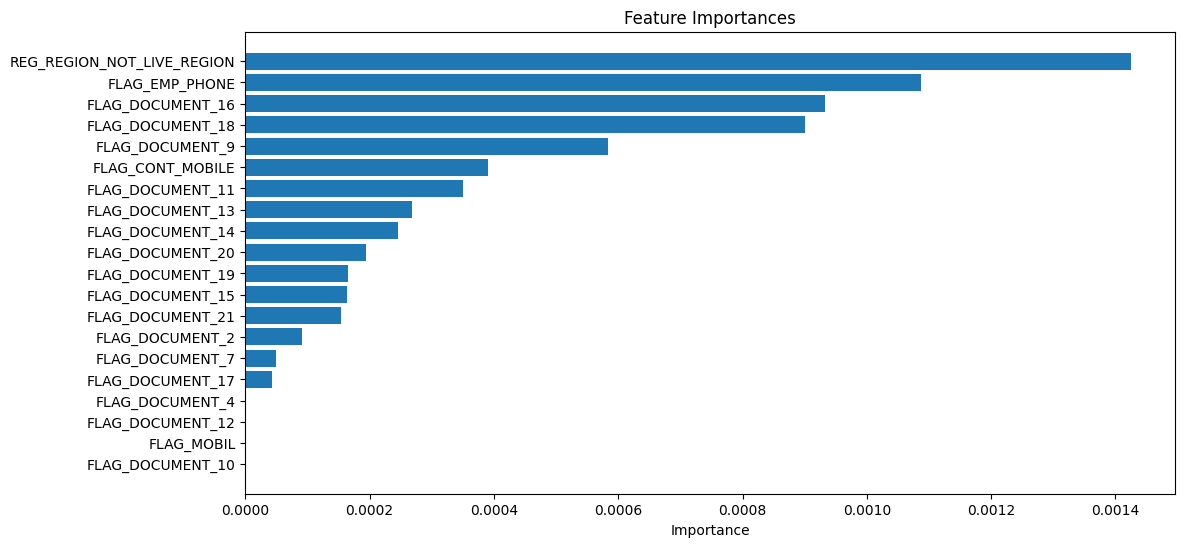

In [56]:
# Get feature importances
importances = forest.feature_importances_

feature_names = features.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

print("Length of importances_df: ", len(importances_df))
step = 22
for i in range(0, len(importances_df), step):
    plt.figure(figsize=(12, 6))
    plt.barh(importances_df['Feature'][i:i+step], importances_df['Importance'][i:i+step])
    plt.xlabel('Importance')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()


In [57]:
print(cleaned_data['TARGET'].value_counts(normalize=True) * 100)

# We can conclude that a blind guess of 0 will give us a very high accuracy so we can't use accuracy as a metric

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64
